## Plot 3D Interaktif

*Rio Agustian Gilang Fernando*

Kode berikut memberikan keluaran berupa surface plot 3D dari fase hasil FFT suatu citra.

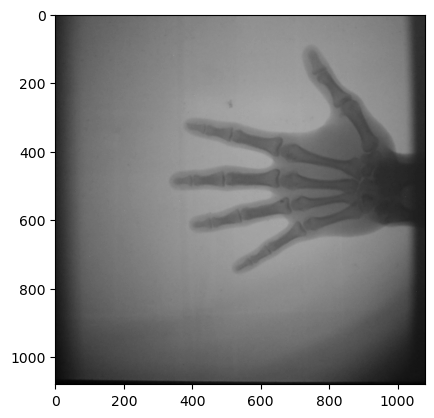

interactive(children=(IntSlider(value=0, description='angle1', max=90, min=-90), IntSlider(value=0, descriptio…

<function __main__.plot_3d(angle1, angle2)>

In [4]:
import cv2 as cv
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from ipywidgets import interact, fixed

# Citra
pth = r"C:\Users\Rio Agustian\Documents\S1 FISIKA\INSTRUMENTASI_MEDIS\hand.png"
img = cv.imread(pth, 0)
plt.imshow(img, cmap="gray")

# Mengubah tipe data citra uint8 ke float32
img_ =  np.float32(img)

# Melakukakan FFT dan pergeseran nol terpusat
dft = cv.dft(img_, flags=cv.DFT_COMPLEX_OUTPUT)
dft_shift = np.fft.fftshift(dft)

# Menghitung fase spektrum hasil FFT
fase = cv.phase(dft_shift[:,:,0], dft_shift[:,:,1], angleInDegrees=True)

# Fungsi untuk membuat plot 3D
def plot_3d(angle1, angle2):
    fig = plt.figure()
    ax = fig.add_subplot(111, projection='3d')
    x = np.arange(0, 1080, 1)
    y = np.arange(0, 1080, 1)
    X, Y = np.meshgrid(x, y)
    ax.plot_surface(X, Y, fase, cmap='jet')
    ax.view_init(angle1, angle2)
    plt.show()

# Membuat widget interaktif untuk mengatur sudut plot
interact(plot_3d, angle1=(-90, 90, 1), angle2=(-90, 90, 1))